In [17]:
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import matplotlib as mpl
import datetime
from matplotlib.ticker import FixedLocator, FixedFormatter
from pylab import rcParams
import time


#Importing data
# data_raw = pd.read_csv(r"C:\Users\udit sharma\Desktop\Aut\Data Mining and Machine Learning\Assignment 2 Dataset\water-treatment.csv")
data_raw_st = pd.read_csv(r"C:\Users\udit sharma\Desktop\Aut\Data Mining and Machine Learning\Assignment 2 Dataset\Sales_Transactions_Dataset_Weekly.csv")
data_raw_st.head()

,Product_Code,W0,W1,W2,W3,W4,W5,W6,W7,W8,...,Normalized 42,Normalized 43,Normalized 44,Normalized 45,Normalized 46,Normalized 47,Normalized 48,Normalized 49,Normalized 50,Normalized 51
0,P1,11,12,10,8,13,12,14,21,6,...,0.06,0.22,0.28,0.39,0.50,0.00,0.22,0.17,0.11,0.39
1,P2,7,6,3,2,7,1,6,3,3,...,0.20,0.40,0.50,0.10,0.10,0.40,0.50,0.10,0.60,0.00
2,P3,7,11,8,9,10,8,7,13,12,...,0.27,1.00,0.18,0.18,0.36,0.45,1.00,0.45,0.45,0.36
3,P4,12,8,13,5,9,6,9,13,13,...,0.41,0.47,0.06,0.12,0.24,0.35,0.71,0.35,0.29,0.35
4,P5,8,5,13,11,6,7,9,14,9,...,0.27,0.53,0.27,0.60,0.20,0.20,0.13,0.53,0.33,0.40


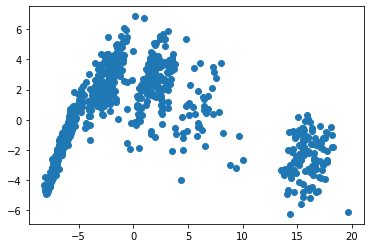

In [18]:
data_raw_st=data_raw_st.drop(columns='Product_Code')
#Scaling the Data
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
# scaler = MinMaxScaler()
scaler.fit(data_raw_st)
data_scale_st=scaler.transform(data_raw_st)
# data_scale=data_raw
# print(data_scale_st)
#Applying PCA to Data
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
data_st=pca.fit_transform(data_scale_st)
# print(data_st)
plt.scatter(data_st[:,0], data_st[:,1])


In [32]:
data_raw_wt = pd.read_csv(r"C:\Users\udit sharma\Desktop\Aut\Data Mining and Machine Learning\Assignment 2 Dataset\water-treatment.csv")
data_raw_wt.head()

,title,Q-E,ZN-E,PH-E,DBO-E,DQO-E,SS-E,SSV-E,SED-E,COND-E,...,COND-S,RD-DBO-P,RD-SS-P,RD-SED-P,RD-DBO-S,RD-DQO-S,RD-DBO-G,RD-DQO-G,RD-SS-G,RD-SED-G
0,D-1/3/90,44101.0,1.5,7.8,NaN,407.0,166.0,66.3,4.5,2110,...,2000.0,NaN,58.8,95.5,NaN,70.0,NaN,79.4,87.3,99.6
1,D-2/3/90,39024.0,3.0,7.7,NaN,443.0,214.0,69.2,6.5,2660,...,2590.0,NaN,60.7,94.8,NaN,80.8,NaN,79.5,92.1,100.0
2,D-4/3/90,32229.0,5.0,7.6,NaN,528.0,186.0,69.9,3.4,1666,...,1888.0,NaN,58.2,95.6,NaN,52.9,NaN,75.8,88.7,98.5
3,D-5/3/90,35023.0,3.5,7.9,205.0,588.0,192.0,65.6,4.5,2430,...,1840.0,33.1,64.2,95.3,87.3,72.3,90.2,82.3,89.6,100.0
4,D-6/3/90,36924.0,1.5,8.0,242.0,496.0,176.0,64.8,4.0,2110,...,2120.0,NaN,62.7,95.6,NaN,71.0,92.1,78.2,87.5,99.5


In [63]:
data_raw_wt=data_raw_wt.drop(columns='title')
data_raw_wt.head()

# Get ndArray of all column names 
data_raw_wt.columns.values
nrow,ncol=data_raw_wt.shape
for col_name in list(data_raw_wt.columns.values):
    data_raw_wt[col_name]=data_raw_wt[col_name].fillna(data_raw_wt[col_name].mean())

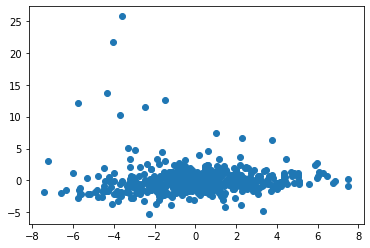

In [77]:
scaler = StandardScaler()
# scaler = MinMaxScaler()
scaler.fit(data_raw_wt)
data_scale_wt=scaler.transform(data_raw_wt)
#Applying PCA to Data
pca = PCA(n_components=2)
data_wt=pca.fit_transform(data_scale_wt)
# print(data_st)
plt.scatter(data_wt[:,0], data_wt[:,1])

In [83]:
data_raw_live = pd.read_csv(r"C:\Users\udit sharma\Desktop\Aut\Data Mining and Machine Learning\Assignment 2 Dataset\live.csv")
data_raw_live.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [87]:
data_raw_live=data_raw_live.drop(columns='status_id')
data_raw_live=data_raw_live.drop(columns='status_type')
data_raw_live=data_raw_live.drop(columns='status_published')
data_raw_live=data_raw_live.drop(columns='Column1')
data_raw_live=data_raw_live.drop(columns='Column2')
data_raw_live=data_raw_live.drop(columns='Column3')
data_raw_live=data_raw_live.drop(columns='Column4')

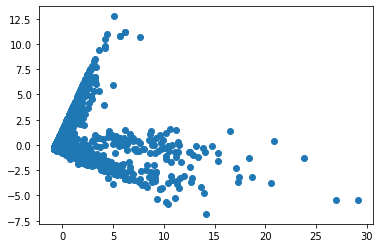

In [89]:
scaler = StandardScaler()
# scaler = MinMaxScaler()
scaler.fit(data_raw_live)
data_scale_live=scaler.transform(data_raw_live)
#Applying PCA to Data
pca = PCA(n_components=2)
data_live=pca.fit_transform(data_scale_live)
plt.scatter(data_live[:,0], data_live[:,1])

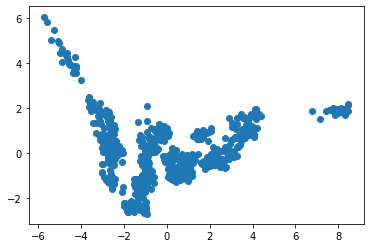

In [90]:
#Importing data
data_raw = pd.read_csv(r"C:\Users\udit sharma\Desktop\Aut\Data Mining and Machine Learning\Assignment 2 Dataset\Dow Jones Index.csv")

#Cleaning the Data
data_raw.describe(include='all')
data_raw.isnull().sum()
data_raw.percent_change_volume_over_last_wk = data_raw.percent_change_volume_over_last_wk.fillna(data_raw.percent_change_volume_over_last_wk.mean())
data_raw.previous_weeks_volume = data_raw.previous_weeks_volume.fillna(data_raw.previous_weeks_volume.mean())
data_raw.head()
# data_raw.columns[3:7]
data_raw[data_raw.columns[3:7]] = data_raw[data_raw.columns[3:7]].replace('[\$,]', '', regex=True).astype(float)
data_raw[data_raw.columns[11:13]] = data_raw[data_raw.columns[11:13]].replace('[\$,]', '', regex=True).astype(float)
data_raw.head()
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data_raw['stock']= label_encoder.fit_transform(data_raw['stock'])
data_raw=data_raw.drop(columns='date')
data_raw.head()
scaler = StandardScaler()
# scaler = MinMaxScaler()
scaler.fit(data_raw)
data_scale=scaler.transform(data_raw)
# data_scale=data_raw
# print(data_scale)
#Applying PCA to Data
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
data_dow=pca.fit_transform(data_scale)
# print(data_dow)
plt.scatter(data_dow[:,0], data_dow[:,1])


In [100]:
from sklearn.cluster import KMeans
data_set_list=[data_dow,data_live,data_st,data_wt]
data_set_names=["Dow Jones dataset","Facebook Live dataset","Sales and Transactions Dataset","Water Treatment Dataset"]
optimum_k=[9,9,9,9]
optimum_eps=[0.01,0.01,0.01,0.01]
optimum_n=[9,9,9,9]

In [109]:
from tabulate import tabulate
tablelistkm=[]
for i,data_set in enumerate(data_set_list):
    data_set_km= KMeans(n_clusters=optimum_k[i])
    data_set_stime=time.time()
    data_set_kmfit=data_set_km.fit(data_set)
    data_set_etime=time.time()
    sse=data_set_kmfit.inertia_
    silhoute_score_dataset = silhouette_score(data_set, data_set_kmfit.labels_)
    data_set_ttime=data_set_etime-data_set_stime
#     print(sse,data_set_ttime)
    tablist=[data_set_names[i],sse,silhoute_score_dataset,data_set_ttime]
    tablelistkm.append(tablist)
print(tabulate(tablelistkm, headers=['data set','Sum Square Error','Silhouette Score','Time Taken']))  
    

data set                          Sum Square Error    Silhouette Score    Time Taken
------------------------------  ------------------  ------------------  ------------
Dow Jones dataset                          299.338            0.536273      0.232866
Facebook Live dataset                     2573.04             0.679733      0.738579
Sales and Transactions Dataset            1271.47             0.464539      0.150313
Water Treatment Dataset                    903.04             0.34667       0.179401


In [105]:
!pip install tabulate

  Using cached tabulate-0.8.7-py3-none-any.whl (24 kB)
